## < 기말 프로젝트 >
### 딥러닝모델과 추론
### 20193260 최진아

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/딥러닝/HN16.csv")


## 뇌졸중이란
- 우리나라에서 사망원인 중 두번째로 많은 원인을 차지할 뿐 아니라 (2003년 통계청 자료에 의하면 연간 10만명당 뇌졸중으로 인한 사망자는 75.5명입니다.) 성인에서 신체적 장애를 일으키는 주범이기도 합니다. 특히 이러한 신체적 장애는 환자 본인은 물론, 가족구성원에까지 지대한 영향을 미치게 된다. 주로 노인질환으로 인식되었지만 요즘은 30~40대에도 뇌졸중이 흔히 발병하는데, 이는 식생활의 변화와 운동부족으로 인해 뇌종중의 주 원인인 비만, 고혈압, 당뇨, 고지혈증 등의 발생률이 높아졌고 이에 대한 조절이 적절하게 되지 않기 때문이라 할 수 있습니다. 

- 출처: https://www.stroke.or.kr:4454/stroke/viewC.php?code=talk&number=4

## 분석 계획
- 변수들간에 다중공선성은 없는지 확인할 것입니다.
- 뇌졸중에 영향을 미치는 요인(수치)이 무엇인지 살펴보고 어떠한 요인(수치이 뇌졸중에 가장 큰 영향을 주는지, 얼만큼 영향을 미치는지 알아볼 것입니다.
- 뇌졸중의 주 원인인 비만, 고혈압, 당뇨, 고지혈증의 유무를 통해 각각의 병들이 뇌졸중에 얼만큼 영향을 주는지 비교할 것입니다.
- 의사결정나무를 통해 뇌졸중인지 아닌지 분류할 것입니다.

## 데이터 설명
#### 공통 (없음:0, 있음 :1, 비해당:8, 모름,무응답:9)
- DI1_dg : 고혈압 유무
- DI3_dg : 뇌졸중 유무
- DE1_dg : 당뇨병 유무
- DI2_dg : 고지혈증 유무
- HE_obe : 저체중(1), 정상(2), 비만(3)

####수치
- HE_sbp : 수축기 혈압
- HE_dbp : 이완기 혈압
- HE_glu : 혈당
- HE_chol : 총콜레스테롤
- HE_TG : 중성지방
- HE_BMI : BMI

#### 음주, 흡연 
공통(8: 비해당, 9:모름, 무응답)
- BS3_1 : 현재 흡연 여부(1:매일피움, 2:가끔피움, 3:과거엔 피웠으나 현재x)
- BS3_2 : 하루평균 흡연량
- BS6_2_2 : 과거흡연자 하루평균 흡연량
- BD2_1 : 한번에 마시는 음주량 (1:1-2잔, 2:3-4잔, 3:5-6잔, 4:7-9잔, 5:10잔 이상)
- BD1_11 : 1년간 음주빈도(1: 최근 1년간 전혀 마시지 않음, 2:월1회미만, 3:월1회정도, 4:월2-4회, 5:주2-3회정도, 6:주4회이상)


In [ ]:
df = df.dropna()
df = df.astype(int)
df

,sex,age,DI1_dg,DI3_dg,DE1_dg,DI2_dg,BS3_1,BS3_2,BS6_3,BD1_11,BD2_1,HE_obe,HE_sbp,HE_dbp,HE_glu,HE_chol,HE_TG,HE_BMI
0,1,61,1,0,1,0,3,888,20,4,3,2,134,80,153,201,86,24
1,2,57,0,0,0,0,8,888,888,8,8,2,112,81,101,197,104,21
2,2,41,0,0,0,0,2,2,888,2,1,2,105,76,104,196,161,23
3,1,39,0,0,0,0,8,888,888,3,1,3,137,99,94,208,215,29
4,2,38,0,0,0,0,8,888,888,4,1,2,98,68,88,174,79,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8145,1,75,1,0,0,0,8,888,888,6,2,3,115,71,129,187,291,32
8146,2,72,1,0,1,1,8,888,888,1,8,3,121,66,126,165,435,30
8147,2,54,0,0,0,0,8,888,888,3,1,2,98,71,79,248,69,19
8148,1,56,1,0,0,0,3,888,20,4,3,3,144,91,101,209,180,27


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 0 to 8149
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sex      5838 non-null   int64
 1   age      5838 non-null   int64
 2   DI1_dg   5838 non-null   int64
 3   DI3_dg   5838 non-null   int64
 4   DE1_dg   5838 non-null   int64
 5   DI2_dg   5838 non-null   int64
 6   BS3_1    5838 non-null   int64
 7   BS3_2    5838 non-null   int64
 8   BS6_3    5838 non-null   int64
 9   BD1_11   5838 non-null   int64
 10  BD2_1    5838 non-null   int64
 11  HE_obe   5838 non-null   int64
 12  HE_sbp   5838 non-null   int64
 13  HE_dbp   5838 non-null   int64
 14  HE_glu   5838 non-null   int64
 15  HE_chol  5838 non-null   int64
 16  HE_TG    5838 non-null   int64
 17  HE_BMI   5838 non-null   int64
dtypes: int64(18)
memory usage: 866.6 KB


In [ ]:
df.rename(columns = {'HE_sbp':'sbp', 'HE_dbp':'dbp', 'HE_glu':'glu', 
                     'HE_chol':'chol', 'HE_TG':'tg', 'HE_BMI':'bmi'},inplace = True)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import matplotlib.pyplot as plt
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## 다중공선성 VIF

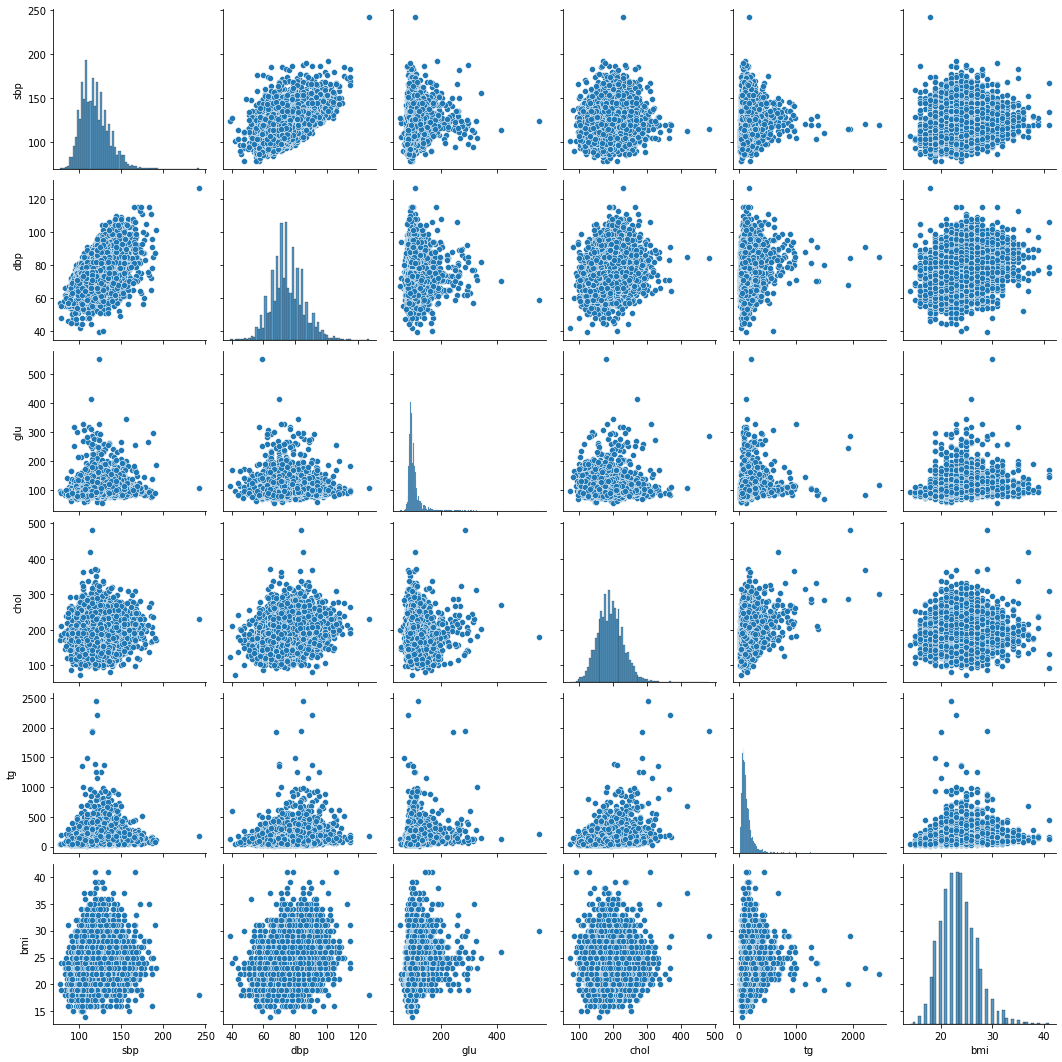

In [ ]:
sns.pairplot(df_d[['sbp', 'dbp', 'glu', 'chol', 'tg', 'bmi']])

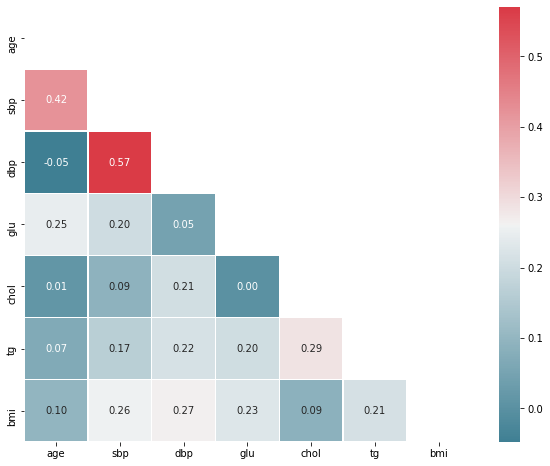

In [ ]:
corr = df_d[['age','sbp', 'dbp', 'glu', 'chol', 'tg', 'bmi']].corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

### age(나이), sbp(수축기 혈압)와 dbp(이완기 혈압)의 다중공선성( >0.4 )이 높기때문에 이 변수들은 제거하고 로지스틱 회귀분석을 진행할 것입니다.

## 로지스틱 회귀분석
- 종속변수 : 뇌졸중
- 독립변수 : 혈당수치, 총콜레스테롤, 중성지방, BMI

In [ ]:
df_d = df.loc[((df['DI3_dg'] == 0) | (df['DI3_dg'] == 1))] 

In [ ]:
df_d['intercept'] = 1
lm = sm.Logit(df_d['DI3_dg'], df_d[['glu', 'chol', 'tg', 'bmi']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.101739
         Iterations 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DI3_dg   No. Observations:                 5610
Model:                          Logit   Df Residuals:                     5606
Method:                           MLE   Df Model:                            3
Date:                Fri, 18 Jun 2021   Pseudo R-squ.:                 0.01608
Time:                        12:58:59   Log-Likelihood:                -570.76
converged:                       True   LL-Null:                       -580.09
Covariance Type:            nonrobust   LLR p-value:                 0.0003215
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
glu            0.0046      0.003      1.713      0.087      -0.001       0.010
chol          -0.0197      0.002     -8.987      0.000      -0.024      -0.015
tg             0.0013      0.001      1.760      0.078      -0.000       0.003
bmi           -0.0372      0.019     -1.920      0.055      -0.075       0.001
==============================================================================
"""

In [ ]:
np.exp(results.params)

glu     1.004573
chol    0.980524
tg      1.001276
bmi     0.963443
dtype: float64

### 로지스틱 회귀를 한 결과 tg(중성지방), bmi(BMI)을 제외한 glu(혈당수치), chol(총콜레스테롤)의 p-value가 0.05보다 작기에 뇌졸중과 통계적으로 유의합니다.

### glu가 1 증가할때 뇌졸중에 걸릴 확률이 1.007배 증가하고,
### chol가 1 증가할때 뇌졸중에 걸릴 확률이 0.98배 증가합니다.

In [ ]:
y, X = dmatrices('DI3_dg ~  glu + chol + tg + bmi', df_d, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif
# 모든 변수의 vif가 10보다 작으므로 다중공선성이 없음을 확인할 수 있음.

,VIF Factor,features
0,76.799035,Intercept
1,1.089254,glu
2,1.095004,chol
3,1.169110,tg
4,1.091083,bmi


## 로지스틱 회귀분석 2
- 종속변수 : 뇌졸중
- 독립변수 : 고혈압 여부, 당뇨병 여부, 고지혈증 여부, 비만 여부

In [ ]:
df[['bmi1', 'bmi2', 'bmi3',]] = pd.get_dummies(df['HE_obe'])
df.head()

,sex,age,DI1_dg,DI3_dg,DE1_dg,DI2_dg,BS3_1,BS3_2,BS6_3,BD1_11,BD2_1,HE_obe,sbp,dbp,glu,chol,tg,bmi,bmi1,bmi2,bmi3
0,1,61,1,0,1,0,3,888,20,4,3,2,134,80,153,201,86,24,0,1,0
1,2,57,0,0,0,0,8,888,888,8,8,2,112,81,101,197,104,21,0,1,0
2,2,41,0,0,0,0,2,2,888,2,1,2,105,76,104,196,161,23,0,1,0
3,1,39,0,0,0,0,8,888,888,3,1,3,137,99,94,208,215,29,0,0,1
4,2,38,0,0,0,0,8,888,888,4,1,2,98,68,88,174,79,21,0,1,0


In [ ]:
# 8과 9를 포함한 행 제거
df_l = df.loc[((df['DI1_dg'] == 0) | (df['DI1_dg'] == 1) ) & ((df['DI3_dg'] == 0) |
             (df['DI3_dg'] == 1)) & ((df['DE1_dg'] == 0) | (df['DE1_dg'] == 1)) & 
              ((df['DI2_dg'] == 0) |  (df['DI2_dg'] == 1))]

df_l

,sex,age,DI1_dg,DI3_dg,DE1_dg,DI2_dg,BS3_1,BS3_2,BS6_3,BD1_11,BD2_1,HE_obe,sbp,dbp,glu,chol,tg,bmi,bmi1,bmi2,bmi3
0,1,61,1,0,1,0,3,888,20,4,3,2,134,80,153,201,86,24,0,1,0
1,2,57,0,0,0,0,8,888,888,8,8,2,112,81,101,197,104,21,0,1,0
2,2,41,0,0,0,0,2,2,888,2,1,2,105,76,104,196,161,23,0,1,0
3,1,39,0,0,0,0,8,888,888,3,1,3,137,99,94,208,215,29,0,0,1
4,2,38,0,0,0,0,8,888,888,4,1,2,98,68,88,174,79,21,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8145,1,75,1,0,0,0,8,888,888,6,2,3,115,71,129,187,291,32,0,0,1
8146,2,72,1,0,1,1,8,888,888,1,8,3,121,66,126,165,435,30,0,0,1
8147,2,54,0,0,0,0,8,888,888,3,1,2,98,71,79,248,69,19,0,1,0
8148,1,56,1,0,0,0,3,888,20,4,3,3,144,91,101,209,180,27,0,0,1


In [ ]:
df_l['intercept'] = 1
logit_mod = sm.Logit(df_l['DI3_dg'], df_l[['intercept','DE1_dg' ,'DI2_dg', 'bmi3']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.099445
         Iterations 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 DI3_dg   No. Observations:                 5610
Model:                          Logit   Df Residuals:                     5606
Method:                           MLE   Df Model:                            3
Date:                Fri, 18 Jun 2021   Pseudo R-squ.:                 0.03827
Time:                        12:58:59   Log-Likelihood:                -557.89
converged:                       True   LL-Null:                       -580.09
Covariance Type:            nonrobust   LLR p-value:                 1.242e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.2294      0.137    -30.836      0.000      -4.498      -3.961
DE1_dg         0.9576      0.225      4.258      0.000       0.517       1.398
DI2_dg         0.8129      0.208      3.913      0.000       0.406       1.220
bmi3           0.0859      0.192      0.448      0.654      -0.290       0.461
==============================================================================
"""

In [ ]:
np.exp(results.params)

intercept    0.014561
DE1_dg       2.605317
DI2_dg       2.254330
bmi3         1.089706
dtype: float64

### DI3_dg(뇌졸중)에 대해 bmi3(비만)을 제외한 DI1_dg(고혈압 여부), DE1_dg(당뇨병 여부),	DI2_dg(고지혈증 여부)이 통계적으로 유의합니다.

### 당뇨병이 있을때가 고혈압이 있을 때에 비해 뇌졸중에 걸릴 확률이 약 2.6배가 되고, 고지혈증이 있을때가 고혈압이 있을 때에 비해 뇌졸중에 걸릴 확률이 약 2.25배가 됩니다.

## 뇌졸중 여부 분류하기
통계적으로 유의한 glu(혈당수치)와 chol(총콜레스테롤)를 사용하여 분석할 것입니다.

In [ ]:
df = df_d[["DI3_dg","sbp"	,"dbp"	,"glu"	,"chol"	,"tg"	,"bmi"]]

In [ ]:
# 기술 통계량
df.describe()

,DI3_dg,sbp,dbp,glu,chol,tg,bmi
count,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000
mean,0.021390,118.905526,75.354189,101.636542,192.766310,140.484492,23.496078
std,0.144695,16.375518,10.006000,25.798905,37.550913,122.920680,3.538707
min,0.000000,78.000000,39.000000,53.000000,74.000000,19.000000,14.000000
25%,0.000000,107.000000,69.000000,89.000000,167.000000,75.000000,21.000000
50%,0.000000,117.000000,75.000000,95.000000,191.000000,110.000000,23.000000
75%,0.000000,129.000000,82.000000,105.000000,217.000000,166.000000,26.000000
max,1.000000,243.000000,127.000000,553.000000,482.000000,2455.000000,41.000000


In [ ]:
data = df[["glu"	,"chol"	]].to_numpy()
target = df["DI3_dg"].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
 
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(4488, 2) (1122, 2)


In [ ]:
# 표준화 진행
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() 
lr.fit(train_scaled, train_target) # 정규화한 데이터셋을 정답셋과 함께 학습을 진행

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 0과 1로 분류하는 정확도가 약 97%로 높게 나오고 과대적합도, 과소적합도 아님.

0.9797237076648841
0.9732620320855615


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.25221408 -0.48151238]] [-4.02774359]


## 의사결정나무


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 각 노드별 최적 분할을 찾을 때, 특성의 순서를 섞음. 약간의 무작위성이 있음.
# fit() method로 훈련, score() method로 정확도 평가
# 훈련세트의 점수가 높고, 테스트 세트 점수가 상대적으로 낮음. : 과대적합 의심

0.9942067736185384
0.9581105169340464


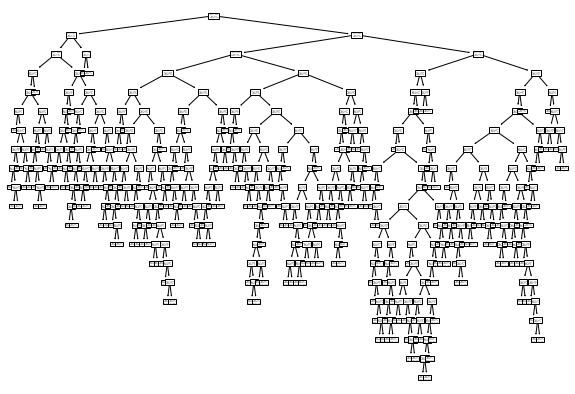

In [ ]:
# 의사결정나무모형
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

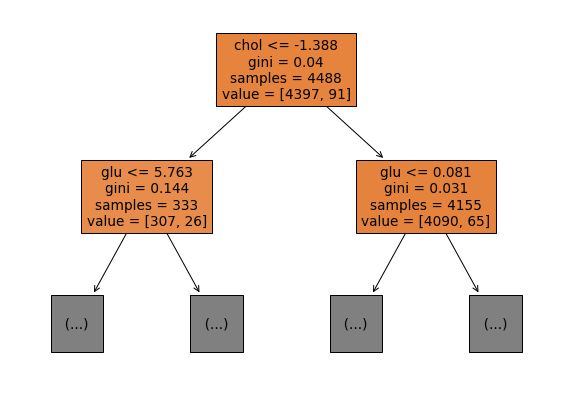

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=[	"glu"	,"chol"	]) # max_depth=1 : 한칸만 내려간 상황
plt.show()

### 왼쪽 가지가 Yes, 오른쪽이 No
### value : 음성 class(뇌졸중x)이 4397개, 양성클래스(뇌졸중o)이 91개

### 지니계수

In [ ]:
1-((4397/4488)**2+(91/4488)**2)
# 지니계수가 0에 가까우므로 순수하다.

0.039730328608513554

In [ ]:
# 정보이득
0.04-(333/4488)*0.144-(4155/4488)*0.031

0.0006156417112299466

### 가지치기하여 과대적합을 방지합니다.

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) # 깊이를 3으로 조절함
dt.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
# 과대적합 없어짐

0.9801693404634582
0.9741532976827094


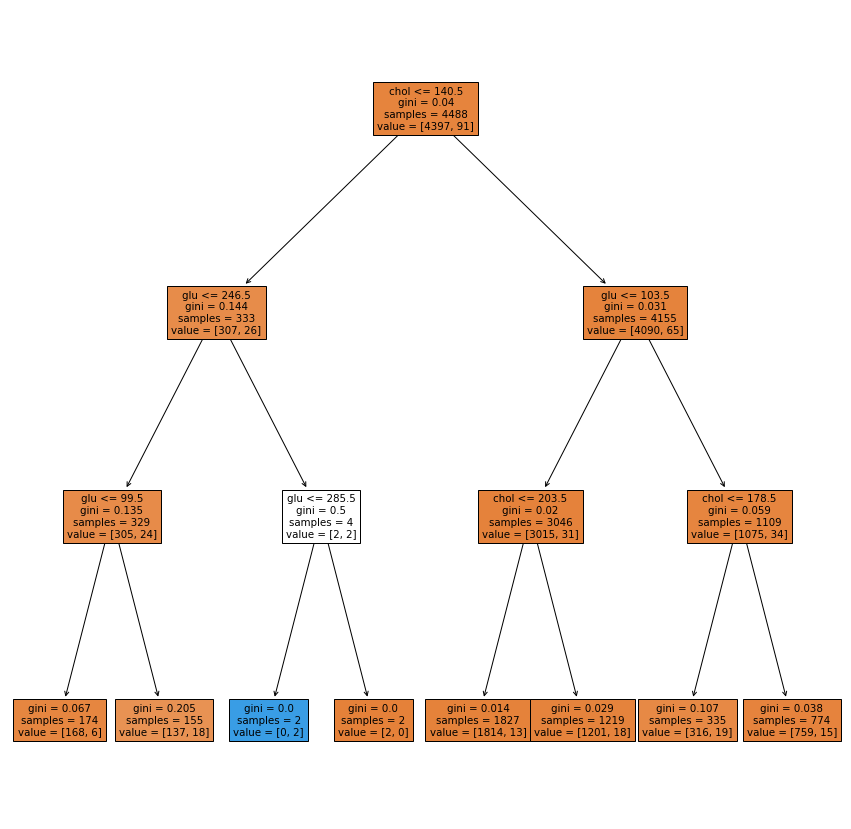

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(dt, filled=True, feature_names=["glu"	,"chol"	])
plt.show()

In [ ]:
print(dt.feature_importances_)

[0.62417288 0.37582712]


### 박스의 색상이 파란색에 해당하면 1(뇌졸중이다), 주황색에 해당하면 0(뇌졸중 아니다)
### glu(혈당수치) 변수의 중요도가 0.62로 chol(콜레스테롤) 0.37보다 높습니다.
### 의사결정나무를 통해 이해하기 쉽고 설명이 가능해졌습니다.

## 신경망 모델
뇌졸중 여부에 가장 중요한 변수인 glu를 통해 신경망 모델을 만들어볼 것입니다.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
import random
from keras.utils import np_utils

In [ ]:
dat = df_d.sample(frac=1).reset_index(drop=True)
dat = dat[["glu","DI3_dg"]][:500]
dat[dat["DI3_dg"]==1]

,glu,DI3_dg
99,97,1
177,104,1
181,149,1
183,127,1
211,109,1
248,93,1
300,103,1
343,90,1
351,115,1
401,93,1


In [ ]:
x_train = dat['glu']
y_train = dat['DI3_dg']

In [ ]:
EPOCHS = 100

OP = 'adam'
BS = 10

### 퍼셉트론 신경망 모델

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

array([[0.03215769],
       [0.03556943],
       [0.03932843]], dtype=float32)

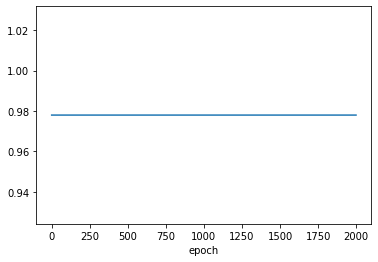

In [ ]:
model.compile(optimizer=OP, loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=2000, batch_size=BS, verbose=False)

plt.plot(hist.history['accuracy'])
plt.xlabel('epoch')

model.predict([120,130,140])

### 다층퍼셉트론 신경망 모델

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

array([[0.02361074],
       [0.02399898],
       [0.02439347]], dtype=float32)

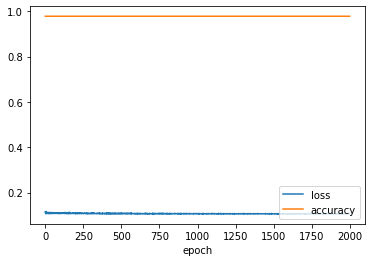

In [ ]:
model.compile(optimizer=OP, loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=2000, batch_size=BS, verbose=False)

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','accuracy'], loc='lower right')

model.predict([120,130,140])

### 딥 다층퍼셉트론 신경망 모델

In [ ]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

array([[0.01015347],
       [0.01085424],
       [0.00981078]], dtype=float32)

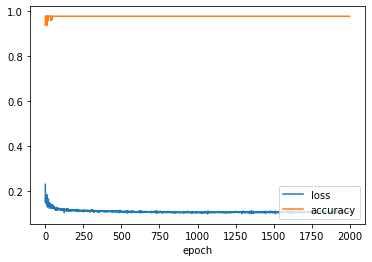

In [ ]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=2000, batch_size=BS, verbose=False)

# 5. 학습과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss','accuracy'], loc='lower right')

# 6. 모델 예측하기
model.predict([120,130,140])

### 세 모형 모두 혈당수치가 120,130,140일때 뇌졸중에 걸릴 확률이 비슷하게 나옵니다.

## 결론

- 수축기 혈압과 이완기혈압은 다중공선성이 존재하기에 제외하고 뇌졸중과 관련있는 혈당수치, 총콜레스테롤, 중성지방, BMI를 통해 로지스틱 회귀분석을 한 결과 혈당수치와 총콜레스테롤만이 통계적으로 유의하고 혈당수치가 1 증가할때 뇌졸중에 걸릴 확률이 1.007배 증가하고 콜레스테롤이 1 증가할때 뇌졸중에 걸릴 확률이 0.98배 증가하는 결과가 나왔습니다.

- 뇌졸중의 주 원인인 고혈압, 당뇨, 고지혈증, 비만 여부에 따라 뇌졸중의 발병률도 로지스틱회귀분석을 통해 알아보았는데 비만을 제외한 고혈압, 당뇨, 고지혈증 통계적으로 유의하고 고혈압을 기준으로 변수끼리 비교해보면 당뇨병이 있을때가 고혈압이 있을때에 비해 뇌졸중에 걸릴 확률이 약 2.6배, 고지혈증이 있을때가 고혈압이 있을때에 비해 뇌졸중에 걸릴 확률이 약 2.25배의 결과가 나왔습니다.

- 따라서 뇌졸중에 혈당수치가 가장 큰 영향을 주고 고혈압에 비해 당뇨병이 뇌졸중에 가장 큰 영향을 주는 것을 파악할 수 있습니다. 

- 위 회귀분석에서 통계적으로 유의한 혈당수치와 콜레스테롤을 사용하여 sklearn을 통해 만든 혈당수치와 총콜레스테롤 모형의 정확도가 97%로 높게 나오고, 의사결정 모형을 만든 결과도 보면 여기서도 신기하게 혈당수치의 중요도가 콜레스테롤의 중요도보다 높은 것을 확인할 수 있었습니다.

- 이 과정들을 통해 뇌졸중과 가장 연관이 깊은 변수는 혈당수치(당뇨)라고 생각이 들어 혈당수치와 뇌졸중의 신경망 모델을 만들어본 결과 뇌졸중일 확률은 높지 않은 결과가 나옵니다. 아마도 뇌졸중인 환자가 뇌졸중이 아닌 환자에 비해 턱없이 적고 혈당수치만으로는 정확한 예측이 안되어 이런 결과가 나왔다고 생각합니다.


## 느낀점

- 흡연과 음주의 변수도 넣어 뇌졸중을 예측하고 분류하는 모형도 만들어보고 싶습니다. 
이번 프로젝트를 통해 파이썬과 가까워지고 딥러닝, 머신러닝, 회귀분석, 분류분석 등 다양한 기법을 더 자세하게 익히고 배울 수 있던 경험이었습니다. 